In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df_games = pd.read_csv('C:\\Users\\subal\\OneDrive\\Desktop\\Documents\\Project\\python\\In-Depth Analysis of Top Games Dataset\\games_dataset.csv')

In [4]:
# Display the first few rows and the columns of the dataset
df_games.head(), df_games.columns

(                      Game Name       Genre         Platform  Release Year  \
 0     Sekiro: Shadows Die Twice      Sports  Nintendo Switch          2014   
 1                       Control      Puzzle  Nintendo Switch          2000   
 2                      Among Us    Strategy  Nintendo Switch          2007   
 3  Call of Duty: Modern Warfare     Stealth      PlayStation          2005   
 4             League of Legends  Simulation               PC          2021   
 
    User Rating  
 0     9.654719  
 1     3.457386  
 2     5.367622  
 3     1.240325  
 4     3.535476  ,
 Index(['Game Name', 'Genre', 'Platform', 'Release Year', 'User Rating'], dtype='object'))

In [8]:
# Display summary statistics of the dataset
df_games.describe(include='all')

,Game Name,Genre,Platform,Release Year,User Rating
count,5000,5000,5000,5000.000000,5000.000000
unique,58,14,5,NaN,NaN
top,The Legend of Zelda: Breath of the Wild,Sports,PC,NaN,NaN
freq,108,403,1056,NaN,NaN
mean,NaN,NaN,NaN,2011.375400,5.524913
std,NaN,NaN,NaN,6.943984,2.598429
min,NaN,NaN,NaN,2000.000000,1.005878
25%,NaN,NaN,NaN,2005.000000,3.260596
50%,NaN,NaN,NaN,2011.000000,5.574233
75%,NaN,NaN,NaN,2017.000000,7.802727


In [10]:
# Check for missing values
df_games.isnull().sum()

Game Name       0
Genre           0
Platform        0
Release Year    0
User Rating     0
dtype: int64

In [12]:
# Remove any rows with missing values
df_games_clean = df_games.dropna()

In [14]:
# Ensure 'Release Year' is an integer
df_games_clean['Release Year'] = df_games_clean['Release Year'].astype(int)

In [16]:
# Check data types
df_games_clean.dtypes

Game Name        object
Genre            object
Platform         object
Release Year      int32
User Rating     float64
dtype: object

C:\Users\subal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


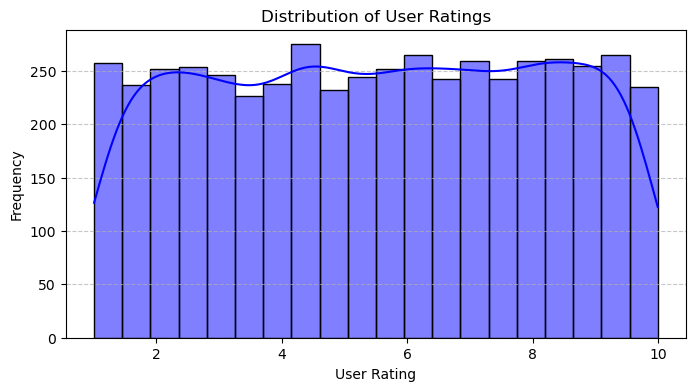

In [20]:
# Plot the distribution of user ratings
plt.figure(figsize=(8, 4))
sns.histplot(df_games_clean['User Rating'], bins=20, color='blue', edgecolor='black', kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

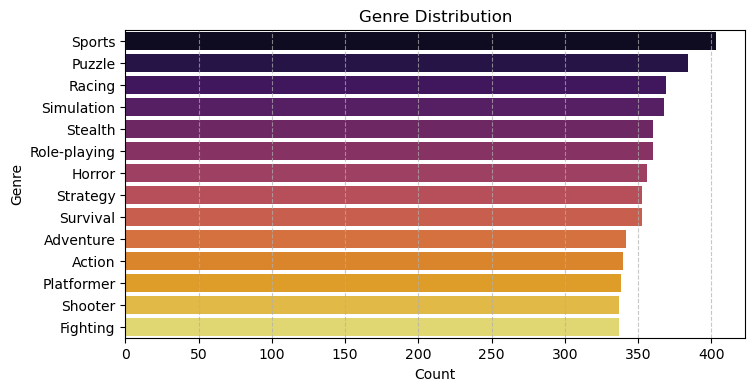

In [48]:
# Plot the distribution of genres
plt.figure(figsize=(8, 4))
sns.countplot(data=df_games_clean, y='Genre', order=df_games_clean['Genre'].value_counts().index, palette='inferno')
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

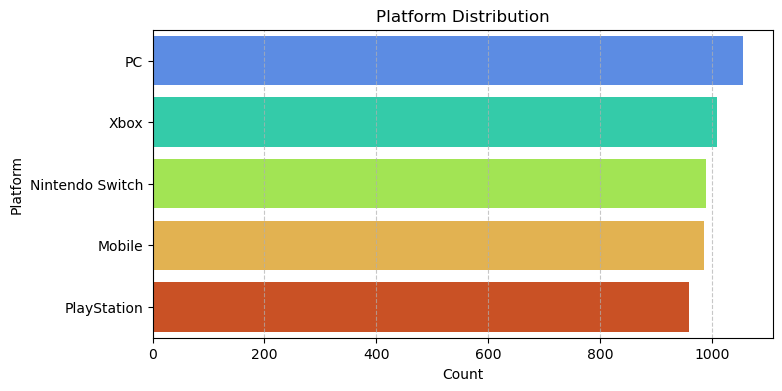

In [52]:
# Plot the distribution of platforms
plt.figure(figsize=(8, 4))
sns.countplot(data=df_games_clean, y='Platform', order=df_games_clean['Platform'].value_counts().index, palette='turbo')
plt.title('Platform Distribution')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

C:\Users\subal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


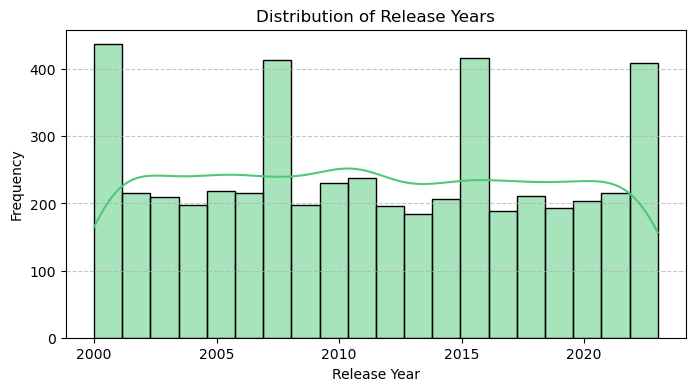

In [34]:
# Plot the distribution of release years
plt.figure(figsize=(8, 4))
sns.histplot(df_games_clean['Release Year'], bins=20, color='#50C878', edgecolor='black', kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

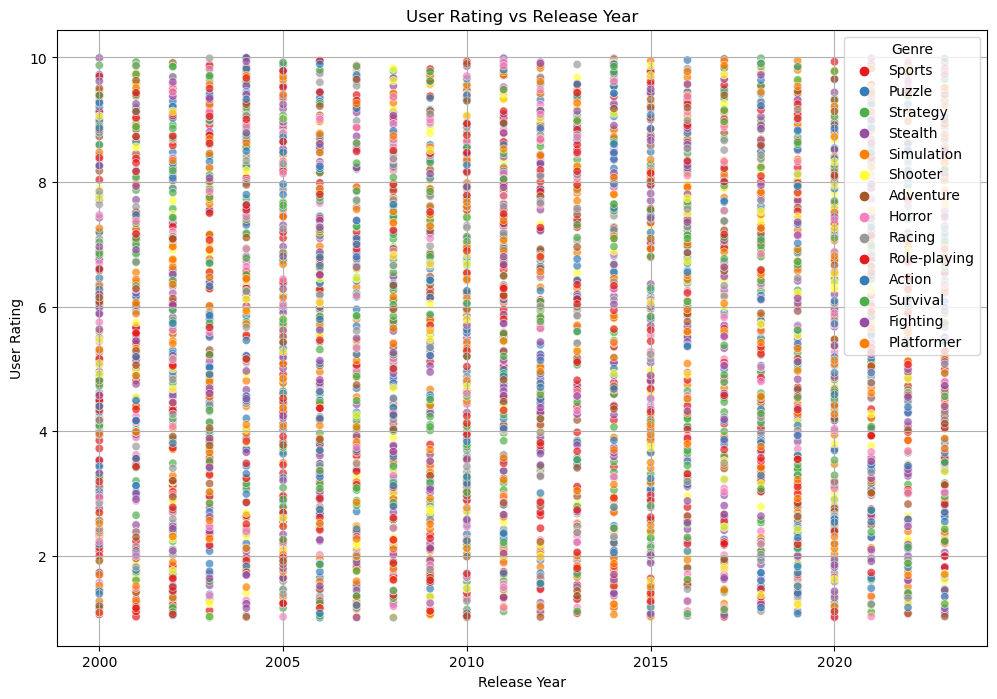

In [46]:
# Scatter plot of User Rating vs Release Year
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_games_clean, x='Release Year', y='User Rating', hue='Genre', palette='Set1', alpha=0.7)
plt.title('User Rating vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('User Rating')
plt.grid(True)
plt.show()

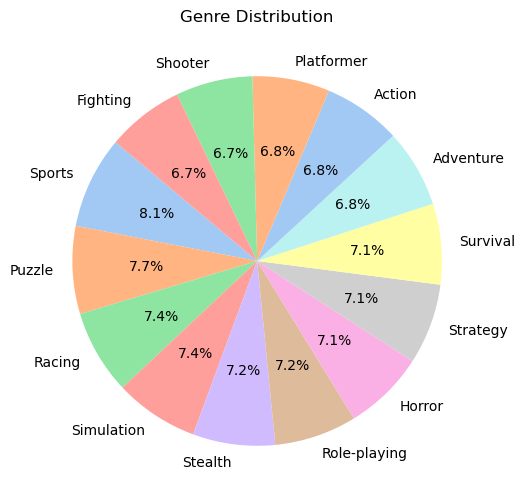

In [62]:
# Pie chart of Genre Distribution
plt.figure(figsize=(6, 6))
genre_counts = df_games_clean['Genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Genre Distribution')
plt.show()

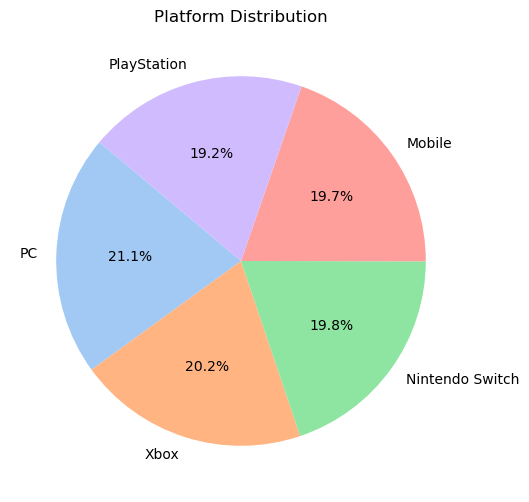

In [64]:
# Pie chart of Platform Distribution
plt.figure(figsize=(6, 6))
platform_counts = df_games_clean['Platform'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Platform Distribution')
plt.show()

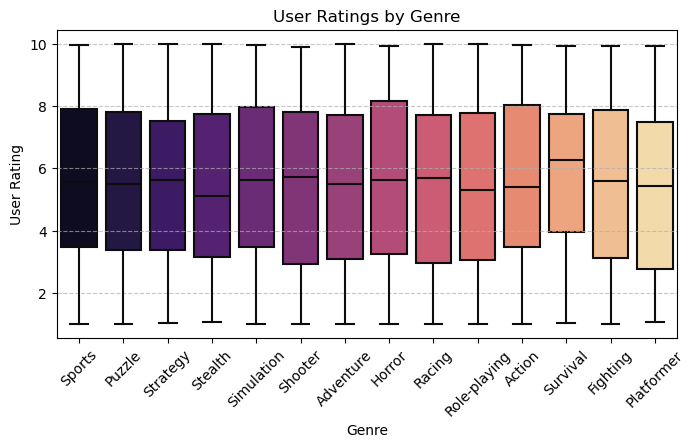

In [66]:
# Boxplot of User Ratings by Genre
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_games_clean, x='Genre', y='User Rating', palette='magma')
plt.title('User Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('User Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

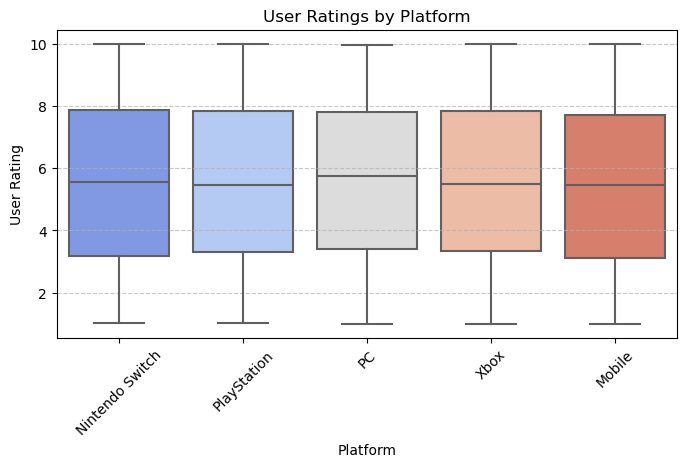

In [68]:
# Boxplot of User Ratings by Platform
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_games_clean, x='Platform', y='User Rating', palette='coolwarm')
plt.title('User Ratings by Platform')
plt.xlabel('Platform')
plt.ylabel('User Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

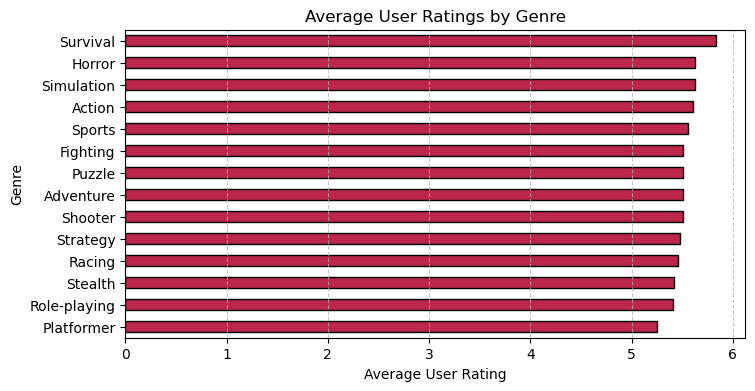

In [84]:
# Calculate average user rating by genre
avg_rating_by_genre = df_games_clean.groupby('Genre')['User Rating'].mean().sort_values()

# Plot average user ratings by genre
plt.figure(figsize=(8, 4))
avg_rating_by_genre.plot(kind='barh', color='#BB2649', edgecolor='black')
plt.title('Average User Ratings by Genre')
plt.xlabel('Average User Rating')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

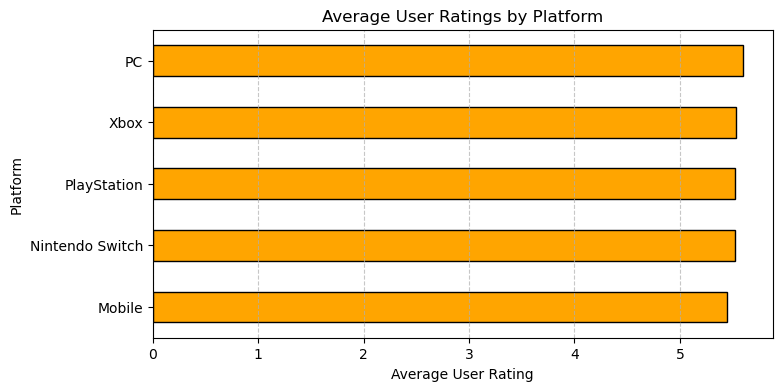

In [86]:
# Calculate average user rating by platform
avg_rating_by_platform = df_games_clean.groupby('Platform')['User Rating'].mean().sort_values()

# Plot average user ratings by platform
plt.figure(figsize=(8, 4))
avg_rating_by_platform.plot(kind='barh', color='orange', edgecolor='black')
plt.title('Average User Ratings by Platform')
plt.xlabel('Average User Rating')
plt.ylabel('Platform')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

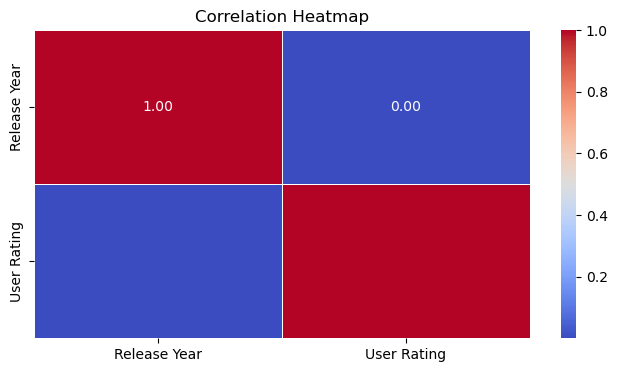

In [96]:
# Compute correlation matrix
corr_matrix = df_games_clean[['Release Year', 'User Rating']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

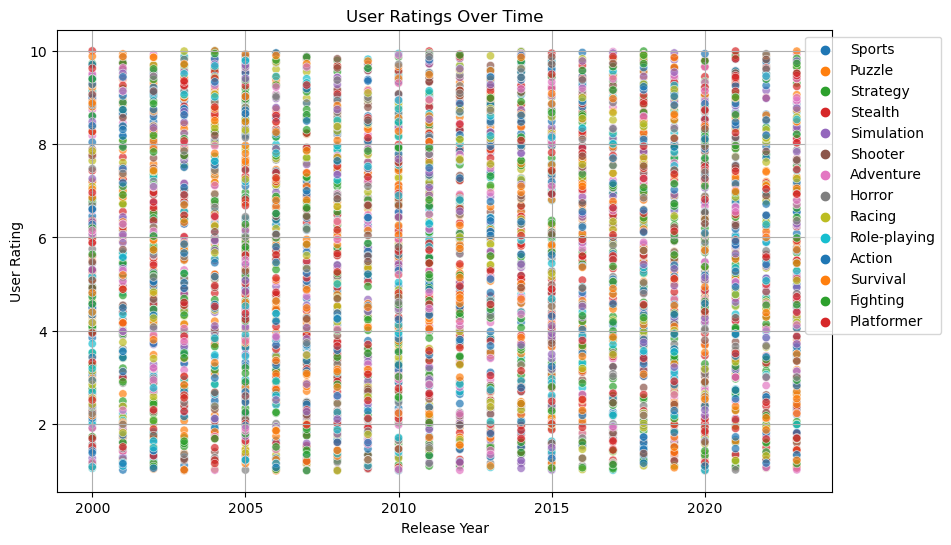

In [102]:
# Plot user ratings over time (by Release Year)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_games_clean, x='Release Year', y='User Rating', hue='Genre', palette='tab10', alpha=0.7)
plt.title('User Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('User Rating')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()

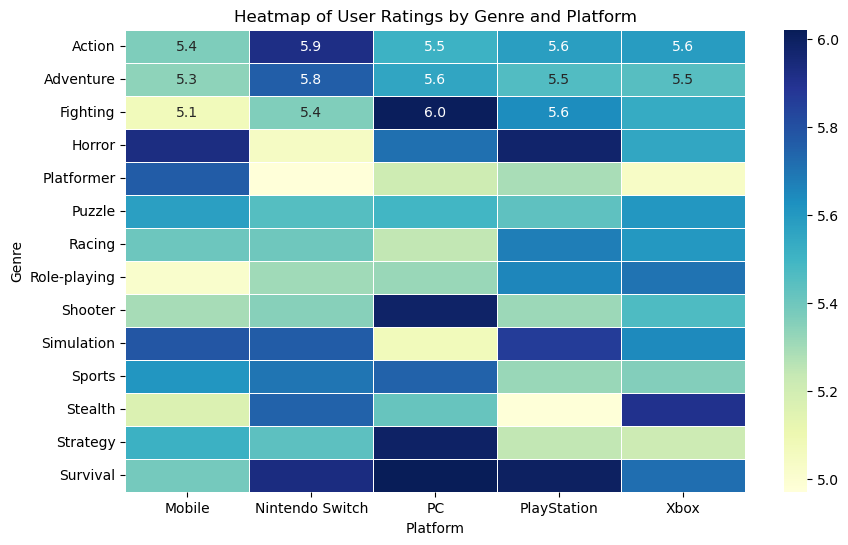

In [104]:
# Pivot table for heatmap
pivot_table = df_games_clean.pivot_table(values='User Rating', index='Genre', columns='Platform', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Heatmap of User Ratings by Genre and Platform')
plt.xlabel('Platform')
plt.ylabel('Genre')
plt.show()

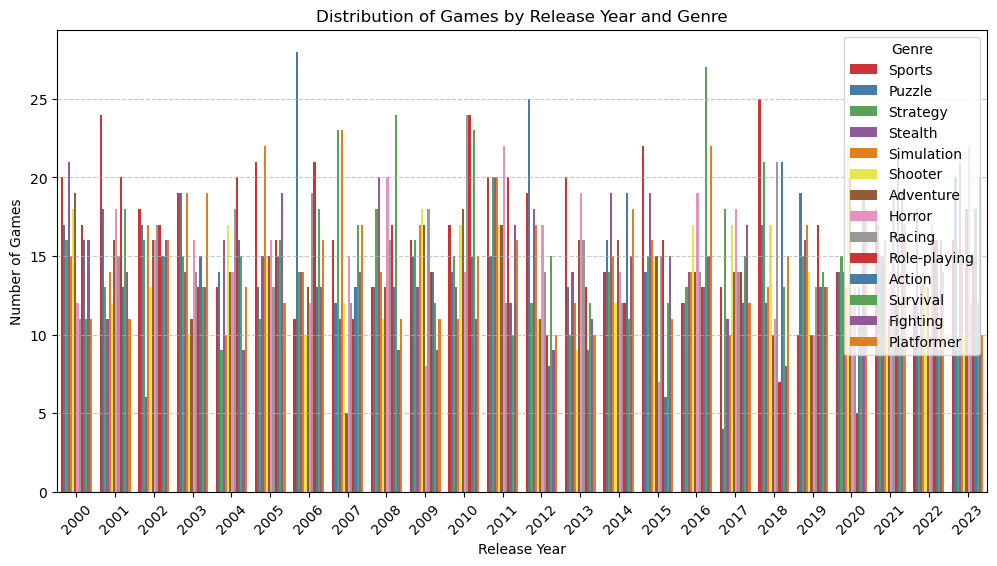

In [116]:
# Plot the count of games by Release Year and Genre
plt.figure(figsize=(12, 6))
sns.countplot(data=df_games_clean, x='Release Year', hue='Genre', palette='Set1')
plt.title('Distribution of Games by Release Year and Genre')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

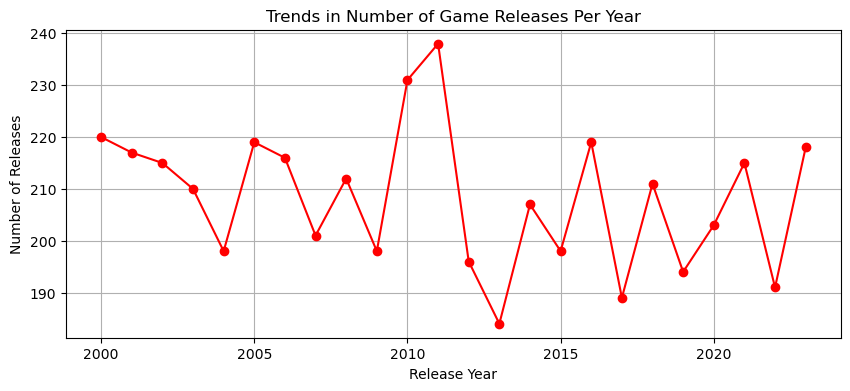

In [112]:
# Plot trends in the number of releases per year
plt.figure(figsize=(10, 4))
release_year_trends = df_games_clean['Release Year'].value_counts().sort_index()
release_year_trends.plot(kind='line', marker='o', color='red')
plt.title('Trends in Number of Game Releases Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

C:\Users\subal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


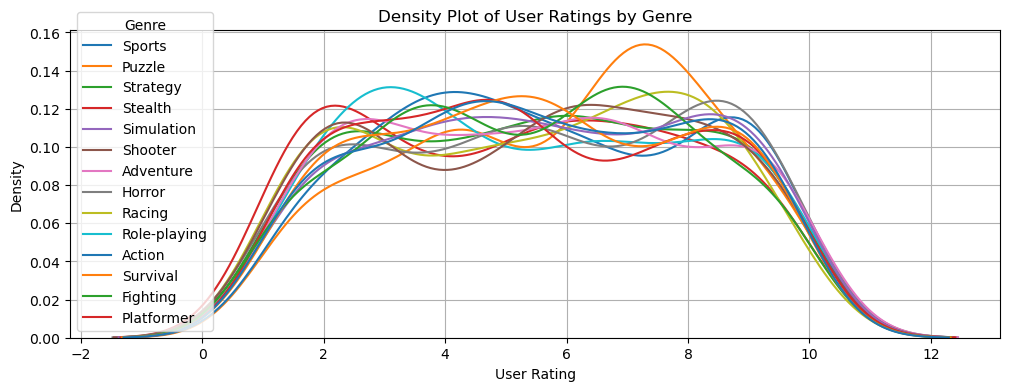

In [118]:
# Kernel Density Estimate (KDE) plot of user ratings by genre
plt.figure(figsize=(12, 4))
sns.kdeplot(data=df_games_clean, x='User Rating', hue='Genre', common_norm=False, palette='tab10')
plt.title('Density Plot of User Ratings by Genre')
plt.xlabel('User Rating')
plt.ylabel('Density')
plt.grid(True)
plt.show()

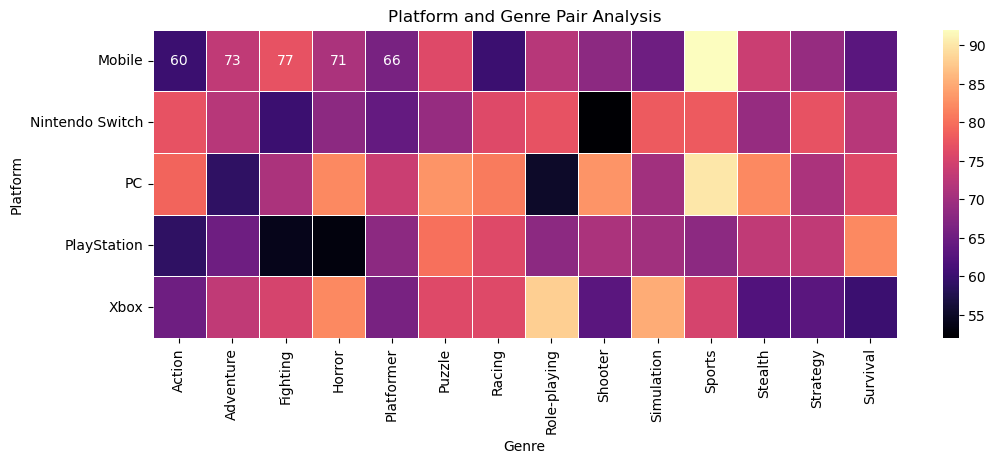

In [128]:
# Create a DataFrame for analysis of platform and genre pairs
platform_genre_counts = df_games_clean.groupby(['Platform', 'Genre']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 4))
sns.heatmap(platform_genre_counts, cmap='magma', annot=True, fmt='g', linewidths=0.5)
plt.title('Platform and Genre Pair Analysis')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.show()

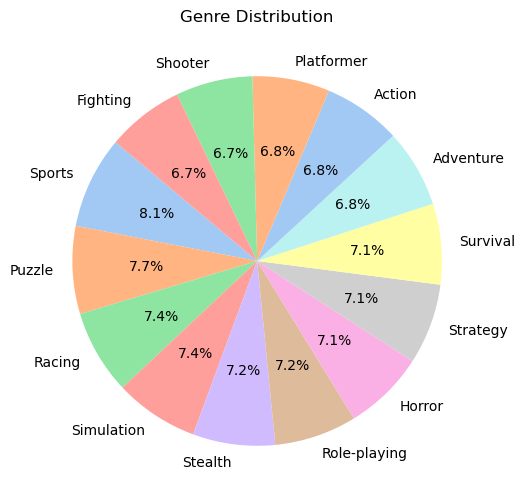

In [132]:
# Pie chart of Genre Distribution
plt.figure(figsize=(6, 6))
genre_counts = df_games_clean['Genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Genre Distribution')
plt.show()

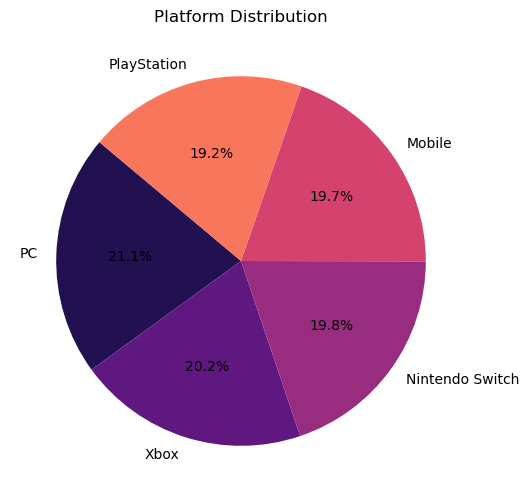

In [134]:
# Pie chart of Platform Distribution
plt.figure(figsize=(6, 6))
platform_counts = df_games_clean['Platform'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', colors=sns.color_palette('magma'), startangle=140)
plt.title('Platform Distribution')
plt.show()

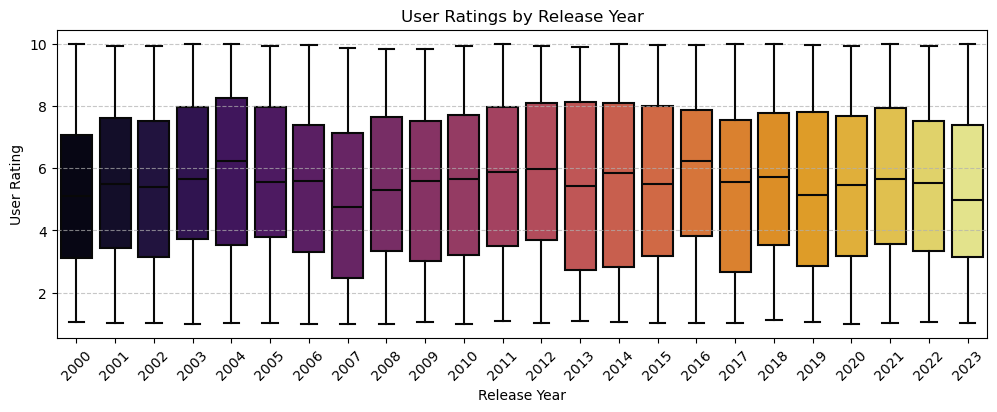

In [140]:
# Box plot of user ratings by release year
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_games_clean, x='Release Year', y='User Rating', palette='inferno')
plt.title('User Ratings by Release Year')
plt.xlabel('Release Year')
plt.ylabel('User Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\subal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


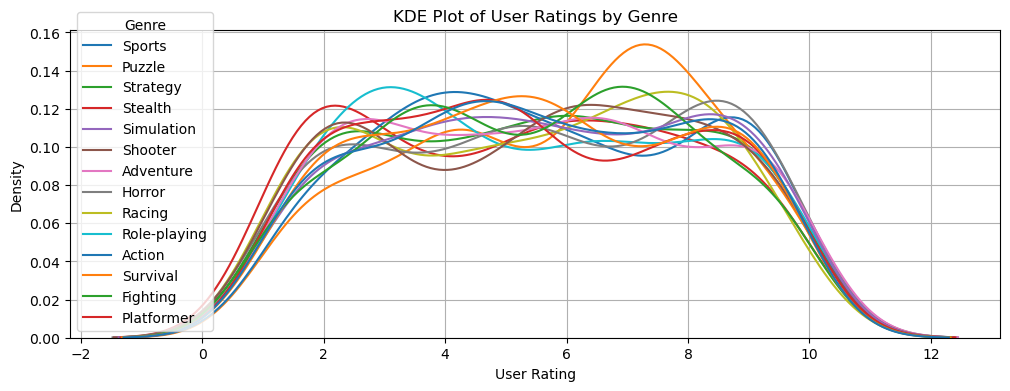

In [142]:
# KDE plot of User Ratings by Genre
plt.figure(figsize=(12, 4))
sns.kdeplot(data=df_games_clean, x='User Rating', hue='Genre', common_norm=False, palette='tab10')
plt.title('KDE Plot of User Ratings by Genre')
plt.xlabel('User Rating')
plt.ylabel('Density')
plt.grid(True)
plt.show()

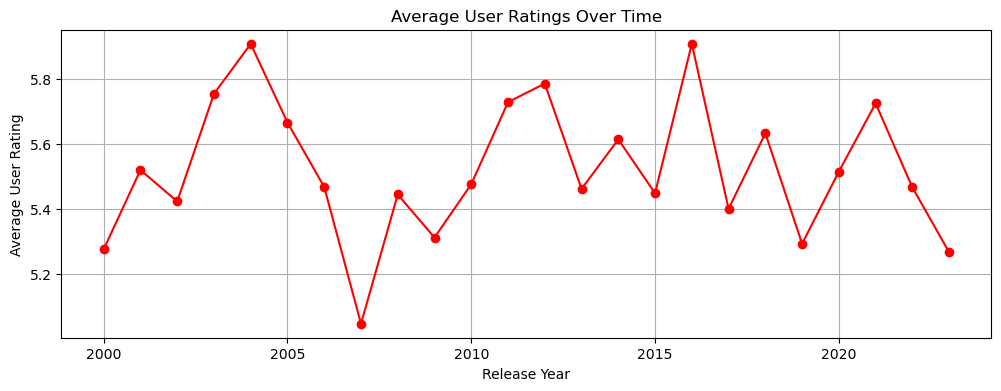

In [144]:
# Line plot of average user ratings over time (by Release Year)
plt.figure(figsize=(12, 4))
avg_rating_over_time = df_games_clean.groupby('Release Year')['User Rating'].mean()
avg_rating_over_time.plot(kind='line', marker='o', color='red')
plt.title('Average User Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average User Rating')
plt.grid(True)
plt.show()